In [165]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

## import file

with open('BOT_od_2018-11-02.csv', 'r') as file:
    array = file.readlines()
    array = [row.split(';') for row in array]

In [166]:
## Create DF 

f2 = pd.DataFrame(array,index =None,columns= ['id','type_desc','kind_desc','subkind_desc','seat','weight','traveltime','km','ts1','lat1','lon1','ts2','lat2','lon2'])
data = f2.drop(index=0)

In [167]:
## Clearing Data

data = data.loc[(data['seat'] != "NULL") 
                & (data['weight'] != "NULL") 
                & (data['weight'] != "ยาง 6 เส้น                 ")
                & (data['weight'] != "ยาง 10 เส้น                ") 
                & (data['weight'] != "ยาง 12 เส้น                ")]

In [184]:
## Convert Type

data['id'] = data['id'].astype(int)
data['seat'] = data['seat'].astype(int)
data['weight'] = data['weight'].astype(int)
data['km'] = data['km'].astype(float)
data['ts1'] = data['ts1'].astype('datetime64[ns]')
data['ts2'] = data['ts2'].astype('datetime64[ns]')
data['lat1'] = data['lat1'].astype(float)
data['lon1'] = data['lon1'].astype(float)
data['lat2'] = data['lat2'].astype(float)
data['lon2'] = data['lon2'].astype(float)

In [172]:
## Heatmap

# sns.heatmap(data[['lat1','lat2','lon1','lon2']])

In [287]:
# data.head()
data.sample(5)

,id,type_desc,kind_desc,subkind_desc,seat,weight,traveltime,km,ts1,lat1,lon1,ts2,lat2,lon2
495298,34069,รถบรรทุกไม่ประจำทาง,บรรทุกเฉพาะกิจ,บรรทุกเฉพาะกิจ(รถเครน),0,0,1:44:50,48.696919,2018-11-02 17:58:30,13.065458,101.189550,2018-11-02 19:43:20,13.361412,101.015690
459374,118325,รถโดยสารไม่ประจำทาง,รถโดยสารปรับอากาศชั้น2,ม.2 (จ),10,3300,0:28:39,6.107368,2018-11-02 18:07:37,7.907815,98.355561,2018-11-02 18:36:16,7.872462,98.378675
108283,115142,รถบรรทุกส่วนบุคคล,ลากจูง,ลากจูง,0,21000,1:39:24,73.237475,2018-11-02 06:42:41,17.061465,99.749449,2018-11-02 08:22:05,17.500206,100.058351
32736,167935,รถบรรทุกไม่ประจำทาง,ลากจูง,ลากจูง,3,25000,0:35:40,36.127125,2018-11-02 04:29:58,15.785724,104.092705,2018-11-02 05:05:38,15.610791,103.826580
583948,130212,รถบรรทุกไม่ประจำทาง,ลากจูง,ลากจูง,0,12000,2:18:59,110.141473,2018-11-02 20:38:26,13.894270,101.580900,2018-11-02 22:57:25,13.092980,101.128720


In [293]:
## Time 01:00:00 to 04:00:00 by รถโดยสารไม่ประจำทาง

# data[(data['ts1'] > '2018-11-02 01:00:00') & (data['ts1'] <= '2018-11-02 04:00:00') & (data['type_desc']== "รถโดยสารไม่ประจำทาง")]

In [261]:
data.head()
len(data)
count = 0
temp = []
for i in range(len(data)):
    carType = data.iloc[i,1]
    if carType == 'รถบรรทุกไม่ประจำทาง' and i < 40000:
        num += 1     
count

11770

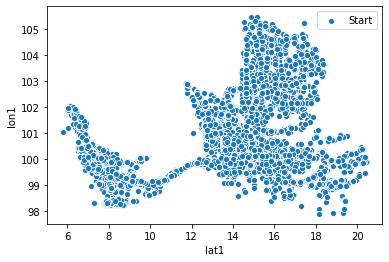

In [264]:
# data.iloc[10,1]
# data.iloc[i,0]

# data.loc[data['id'] == 10601]

test = data.head(40000).groupby("id")[["lat1","lon1"]].min()
# temp = []
# for i in range(len(test)):
#     print(test.iloc[i])
#     temp = test.iloc[i].tolist()
# temp
# test
# test = data.groupby(data['id']==10601)[["lat1","lon1"]].min()
# test
# [14.997043, 100.349281]
sns.scatterplot(x="lat1", y="lon1", data=test, label = "Start")

In [281]:
test2 = data.head(40000).groupby("type_desc")[["lat1","lon1"]].min()
test2

,lat1,lon1
type_desc,,
รถบรรทุกส่วนบุคคล,6.283709,97.916893
รถบรรทุกไม่ประจำทาง,6.012762,98.073510
รถโดยสารประจำทาง,5.970902,97.930960
รถโดยสารส่วนบุคคล,7.865230,98.297020
รถโดยสารไม่ประจำทาง,5.778810,97.955241


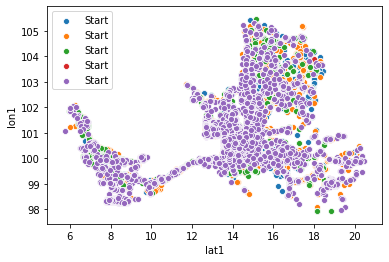

In [282]:
# test2 = data.head(40000).groupby("type_desc")[["lat1","lon1"]].min()
carType1 = data.head(40000).loc[data['type_desc']== "รถบรรทุกส่วนบุคคล"]
sns.scatterplot(x="lat1", y="lon1", data=carType1, label = "Start")

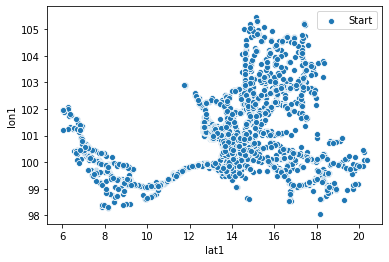

In [283]:
carType2 = data.head(40000).loc[data['type_desc']== "รถบรรทุกไม่ประจำทาง"]
sns.scatterplot(x="lat1", y="lon1", data=carType2, label = "Start")

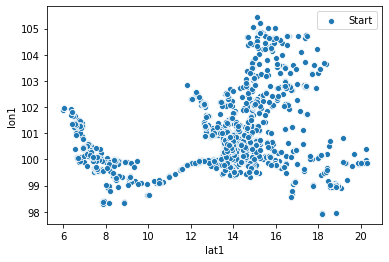

In [284]:
carType3 = data.head(40000).loc[data['type_desc']== "รถโดยสารประจำทาง"]
sns.scatterplot(x="lat1", y="lon1", data=carType3, label = "Start")

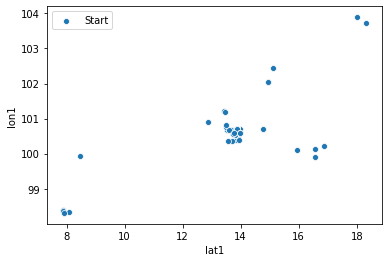

In [285]:
carType4 = data.head(40000).loc[data['type_desc']== "รถโดยสารส่วนบุคคล"]
sns.scatterplot(x="lat1", y="lon1", data=carType4, label = "Start")

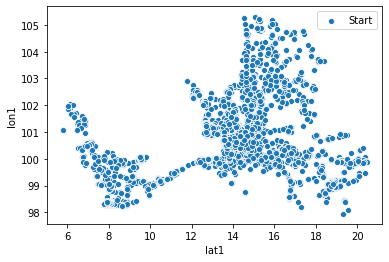

In [286]:
carType5 = data.head(40000).loc[data['type_desc']== "รถโดยสารไม่ประจำทาง"]
sns.scatterplot(x="lat1", y="lon1", data=carType5, label = "Start")

In [128]:
# data.groupby("id").count()

In [ ]:
# plt.figure(figsize=(15,5))
# sns.scatterplot(x="lat1", y="lon1", data=data, label = "Start")
# sns.scatterplot(x="lat2", y="lon2", data=data , label = "Stop")

In [83]:
# ex1 = data[data["id"]=="0000051"]

In [129]:
# plt.figure(figsize=(15,5))
# sns.scatterplot(x="nLat1", y="nLon1", data=ex1, label = "Start")
# sns.scatterplot(x="nLat2", y="nLon2", data=ex1, label = "Stop")
# # plt(13.668870,100.714000)
# # plt(13.566700,100.281300)

In [130]:
# pmin = ex1.groupby("id")[["lat1","lon1"]].min()
# pmax = ex1.groupby("id")[["lat1","lon1"]].max()
# print(pmin,"\n",pmax)

In [131]:
# sites_lat_y = ex1['nLat1'].tolist()
# sites_lat_y

In [116]:
# from mpl_toolkits.basemap import Basemap
# plt.figure(figsize=(8, 8))
# m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
# # m.bluemarble(scale=0.5);
# fig = plt.figure(figsize=(8, 8))
# m = Basemap(projection='lcc', resolution=None,
#             width=8E6, height=8E6, 
#             lat_0=13.543530, lon_0=100.211700,)
# m.etopo(scale=0.5, alpha=0.5)

# # Map (long, lat) to (x, y) for plotting
# x, y = m(13.543530, 100.211700)
# plt.plot(x, y, 'ok', markersize=5)
# plt.text(x, y, ' Seattle', fontsize=12);